<a href="https://colab.research.google.com/github/Jonchyk/Vis/blob/main/PS0_PS1_vis_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

# DAT MAN: pandas, like stata, your lib for all data mgmt, most stats, (and much vis)


note:  pandas is kind of like stata, or more like r, but not really like
the rest of Py, and helps a lot with traditional data

REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


### [jan18] dive into python: load real data (csv file), and basics                                                

(do note can collapse sec, and run all cells at once)

any software incl excel and spss can save as csv,    just make sure it is clean: one short alphanumeric header per column                                                                                                                                                                  
let's do an example, your first ps will be sth like that but using your own data                                                             



#PS0 List of datasets to be used:

I'll be using datasets from the data management course. Source data comes from the sources below. I pulled the income file I cleaned from data management PS0/PS1, and the population file and pulled them in! I also figured out merging, and some of the complications that come with it :-)

Early Grade Reading Assessment - Okuu Keremet, Baseline Study 2021 (Not yet uploaded)

Why: This study assessed grade 2 students in all regions and representative schools of Kyrgyzstan, marking language, urban/rural, and provides a wealth of data.
I’ll be able to use this to create a clean composite score to compare to the NST scores and review my research question.
This data is not yet available but will be published on the DDL and requestable (USAID Development Data Library). I have permission to use it for my class and my capstone but cannot publish it myself to the internet.

National Scholarship Test Scores, Kyrgyzstan 2023 (Not yet uploaded)

Why: This is the crux of my study; I’ll need to grab the following data from the 2023 National Scholarship Test Report:
Tables 1 - Total Tests, Average Score, Average Score of students who receive scholarships, by region
Tables 9 - Total Tests, and language (Russian or Kyrgyzstan) by Region
Merge into one dataset. This will let me dig into the original research question that I am jumping off from—by seeing if there’s still a disparity in results based on language (Russian doing better than Kyrgyz) and by Region.
Reports link: https://testing.kg/reports (website is finicky but will try it again tomorrow).

MICS from UNICEF – Kyrgyzstan 2023 - Uploaded

Why: This data provides a few interesting things that I can use for my greater research project on National Test Scores and Early Grade Test Scores by Region and Language, namely:
Foundational learning assessment of reading and numeracy scales at the 2nd Grade Level
Reading is broken into reading a passage, and reading comprehension
Numeracy is broken into number identification, identifying which number is larger, summing, and pattern recognition
All info provides region and language; it also notes the language of instruction and language spoken at home for each individual respondent.
I need to do a ton of work to clean this into a usable format, since respondents are ages 7-14, and may be in any grade. Lots of filtering and conditionals needed to get this to the right aged respondents.
Noting: The National Scholarship Test is 40% math problems, 60% reading comprehension and grammar based on this report. I need to discuss this with you briefly as I determine if I can make a similar “weight” for the MICS scores.
Data here: https://mics.unicef.org/surveys?display=card&f%5b0%5d=region:4026&f%5b1%5d=year:2023
Report here with protocol: https://mics.unicef.org/sites/mics/files/2024-10/Kyrgyzstan%202023%20MICS_English.pdf

Global Data Lab – Kyrgyzstan: - one data set uploaded – population by region, need to grab others

Why: Once logged in, there’s a lot of good summary data by region/subnational level that I can use. For now, I have taken population data, uploaded it, and reviewed. I can even get the population break-out by age for each region, which I will certainly use in the final dataset as I look at how the overall population makeup, regionally, is changing in Kyrgyzstan.
Link: https://globaldatalab.org/areadata/profiles/KGZt/
Kyrgyzstan Bureau of Stats: - one dataset uploaded – per capita income

Not great data, but it will help me reach the merge target for future PS. They do have a few interesting pieces on income per capita, share of GDP per region, birth, and death rates by region. I can use these as an additional piece to review demographic changes and regional economics' relation to education outcomes.
Link: https://stat.gov.kg/en/statistics/trud-i-zarabotnaya-plata/

Data from INFORM – UNDRR and USAID supported – Not yet uploaded

I just found this dataset today, but it looks really cool! It gives an incidence rate for specific natural disasters by region, amongst other things.
The prior literature review I did noted how geographic complexities in the mountainous regions (a large portion of Kyrgyzstan) have massive impacts on education quality in the regions. I think this incidence rate of specific issues (earthquakes, landslides, floods) would be great to review and include!
Link: https://data.humdata.org/dataset/inform-subnational-risk-index-for-caucasus-and-central-asia

In [ ]:
#download file from online and save in colab as pop.csv;
!wget -q -O pop1.csv https://docs.google.com/spreadsheets/d/1KhpzQlgZqSFgO1Y-axXpSwrsVn9keIhAUITR_m_YIDw/export?format=csv
#download the income file as well.
!wget -q -O income.csv https://docs.google.com/spreadsheets/d/1IQ6YXPmOTZReA-DLWcKqbzkxAsplvrZM9ggXKITnhO4/export?format=csv


In [ ]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
income.csv  pop1.csv  sample_data


In [ ]:
#read in my files
pop = pd.read_csv('pop1.csv')
pop
income = pd.read_csv('income.csv')
income

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,CAGR
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,5.72,5.84,5.96,6.08,6.20,6.32,6.44,6.57,6.69,1.52
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.45,0.48,0.47,0.47,0.46,0.46,0.46,0.45,0.45,0.38
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,0.78,0.75,0.86,0.97,1.08,1.19,1.31,1.42,1.53,3.53
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,1.01,1.04,1.03,1.01,0.99,0.98,0.96,0.95,0.93,0.84
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.47,0.44,0.45,0.47,0.48,0.50,0.51,0.53,0.54,1.41
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.07,1.15,1.13,1.10,1.07,1.05,1.02,0.99,0.96,0.12
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.27,0.28,0.28,0.29,0.29,0.30,0.30,0.31,0.31,1.20
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.39,1.41,1.45,1.49,1.53,1.57,1.62,1.66,1.70,1.33
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.29,0.30,0.29,0.29,0.28,0.28,0.27,0.27,0.26,1.19


,Region,2019,2020,2021,2022,2023
0,Kyrgyz Republic,65.01,64.33,76.02,90.89,111.10
1,Batken oblast,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abat oblast,60.53,61.92,76.30,94.38,118.10
3,Yssyk-Kul oblast,65.40,73.57,82.03,104.23,115.56
4,Naryn oblast,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas oblast,55.28,60.18,65.55,79.89,96.13
7,Chui oblast,69.94,66.03,77.25,91.20,106.32
8,Bishkek city,72.51,68.76,79.43,97.02,123.12
9,Osh city,55.94,54.55,63.16,67.69,86.69


In [ ]:
#rename names so we can merge - replace method.
income['Region'] = income['Region'].replace({
    'Kyrgyz Republic': 'Total',
    'Batken oblast': 'Batken',
    'Jalal-Abat oblast': 'Jalal-Abad',
    'Yssyk-Kul oblast': 'Issyk-Kul',
    'Naryn oblast': 'Naryn',
    'Osh city': 'Osh',
    'Talas oblast': 'Talas',
    'Chui oblast': 'Chuy',
    'Bishkek city': 'Bishkek'
})
income
#not great that  osh and osh city are here. can't merge those, though perhaps we could play with pop data to backtest a merged amount.
#for now let's drop osh oblast and focus on the city since this is just for ease of use.
income.drop(index=5, inplace=True)
income





,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


In [ ]:
#can i try merging now?
merged_df = pd.merge(pop, income, on='Region', how='inner')

#ok! this is cool. I think i need to clean up the columns since now i have 2019_x, and y. that's a good lesson for next time to do it prior to merging. beginner's mistake.
merged_df.rename(columns={'2019_x':'2019','2020_x':'2020','2021_x':'2021','2019_y': '2019 income', '2020_y': '2020 income', '2021_y': '2021 income', '2022':'2022 income', '2023':'2023 income'}, inplace=True)
merged_df

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13


In [ ]:
merged_df.columns #list var names

Index(['Region', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', 'CAGR', '2019 income', '2020 income',
       '2021 income', '2022 income', '2023 income'],
      dtype='object')

In [ ]:
merged_df.head(2)
merged_df.tail(2)

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95


,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13


In [ ]:
merged_df #get spreadsheet view: can sort on cols, filter, and copy

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13


In [ ]:
merged_df[["Region","2003"]][0:3] #subset or slice, added to make it a list!

,Region,2003
0,Total,5.04
1,Batken,0.42
2,Bishkek,0.78


In [ ]:
#let's look at the region, start year, end year, and the CAGR i calculated in datamanagement.

merged_df[["Region","2003", "2021", "CAGR"]][0:9]

,Region,2003,2021,CAGR
0,Total,5.04,6.69,1.52
1,Batken,0.42,0.45,0.38
2,Bishkek,0.78,1.53,3.53
3,Chuy,0.80,0.93,0.84
4,Issyk-Kul,0.42,0.54,1.41
5,Jalal-Abad,0.93,0.96,0.12
6,Naryn,0.25,0.31,1.20
7,Osh,1.37,1.70,1.33
8,Talas,0.21,0.26,1.19


In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
#swapped out with my data for kicks
# say frac=.1 for 10perc, or n=10 for 10obs
merged_df.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69


In [ ]:
#dat["2019 income"]

In [ ]:
merged_df["2019 income"].mean() # median, mode, stdev


62.120000000000005

In [ ]:
merged_df["2019 income"].value_counts(dropna=False) #.nlargest(3) a tab or freq table. This doesn't work well with my current data

,count
2019 income,
65.01,1
61.14,1
72.51,1
69.94,1
65.40,1
60.53,1
53.33,1
55.94,1
55.28,1


<Axes: >

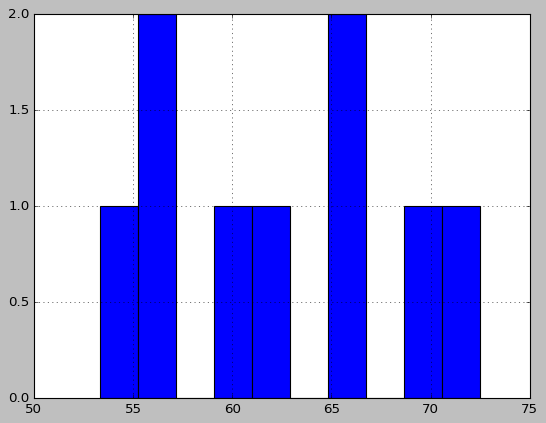

In [ ]:
merged_df["2019 income"].hist() #done, but not sure this is great

In [ ]:
pd.crosstab(merged_df["Region"], merged_df["2019"]) #need a different dataset for this, not appropriate for a crosstab

2019,0.27,0.30,0.46,0.51,0.96,1.02,1.31,1.62,6.44
Region,,,,,,,,,
Batken,0,0,1,0,0,0,0,0,0
Bishkek,0,0,0,0,0,0,1,0,0
Chuy,0,0,0,0,1,0,0,0,0
Issyk-Kul,0,0,0,1,0,0,0,0,0
Jalal-Abad,0,0,0,0,0,1,0,0,0
Naryn,0,1,0,0,0,0,0,0,0
Osh,0,0,0,0,0,0,0,1,0
Talas,1,0,0,0,0,0,0,0,0
Total,0,0,0,0,0,0,0,0,1


<Axes: xlabel='Region', ylabel='[2019 income]'>

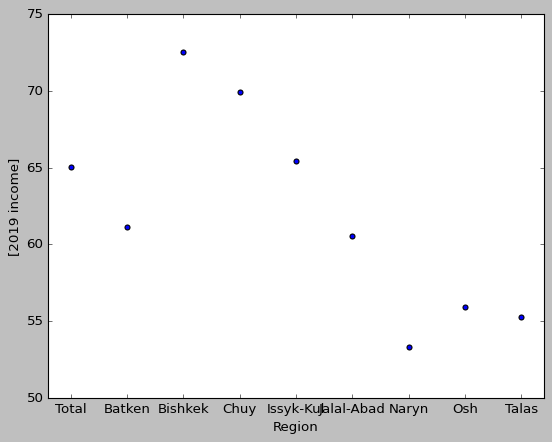

In [ ]:
merged_df.plot(kind='scatter', y=['2019 income'], x='Region') #This is what sparked me going back and merging the two files; region vs incomes isn't interesting. Population vs income is!

Text(6.44, 65.01, 'Total')

Text(0.46, 61.14, 'Batken')

Text(1.31, 72.51, 'Bishkek')

Text(0.96, 69.94, 'Chuy')

Text(0.51, 65.4, 'Issyk-Kul')

Text(1.02, 60.53, 'Jalal-Abad')

Text(0.3, 53.33, 'Naryn')

Text(1.62, 55.94, 'Osh')

Text(0.27, 55.28, 'Talas')

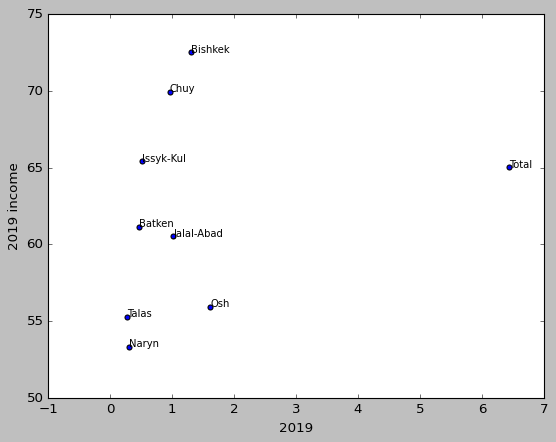

In [ ]:
#So apparently, if I want to create a scatterplot with labels, need to use the following code and "ax"...Will learn more to see if there's a differnet way to do it.
ax = merged_df.plot(kind='scatter', x='2019', y='2019 income')
# Add region labels to the plot using the following:
for i, row in merged_df.iterrows():
    ax.text(row['2019'], row['2019 income'], row['Region'], fontsize=9)

Text(6.57, 64.33, 'Total')

Text(0.45, 61.6, 'Batken')

Text(1.42, 68.76, 'Bishkek')

Text(0.95, 66.03, 'Chuy')

Text(0.53, 73.57, 'Issyk-Kul')

Text(0.99, 61.92, 'Jalal-Abad')

Text(0.31, 52.47, 'Naryn')

Text(1.66, 54.55, 'Osh')

Text(0.27, 60.18, 'Talas')

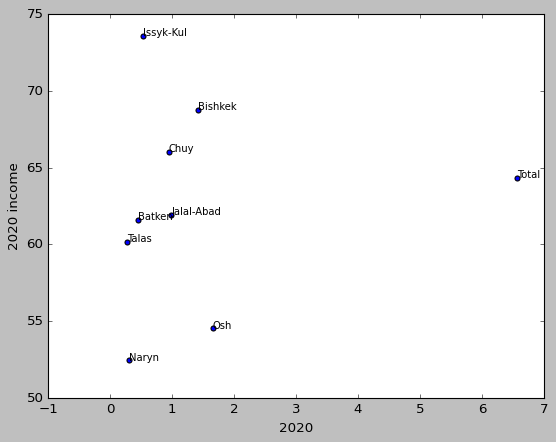

In [ ]:
# doing this for 2020 now.
ax = merged_df.plot(kind='scatter', x='2020', y='2020 income')
# Add region labels to the plot
for i, row in merged_df.iterrows():
    ax.text(row['2020'], row['2020 income'], row['Region'], fontsize=9)
#interesting to note Issyk-Kul jumped way up!

In [ ]:
merged_df[['2019','2019 income']].corr().round(2)#Same issue here. not great data for this.

,2019,2019 income
2019,1.00,0.24
2019 income,0.24,1.00


In [ ]:
#finalstep, let's get that csv file i merged all downloaded!
from google.colab import files
#convert dataframe to csv
merged_df.to_csv('pop_incomepercapita.csv', index=False)

# Download the file.
files.download('pop_incomepercapita.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### [jan25] I/O import/export, and des sta
can import-export many formats incl xls, stata, sas:
https://pandas.pydata.org/docs/user_guide/io.html

if you work a lot with xls check out:

https://realpython.com/openpyxl-excel-spreadsheets-python/

https://automatetheboringstuff.com/chapter12/


In [ ]:
#lets start with html, and especially handy wikipedia
#for match use header of col; ideally unique; case may matter
pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey',match='Density',flavor=None)[0].head(3)
#pd.read_html("https://en.wikipedia.org/wiki/Premier_League", match = "Position")[0].head(3)
#pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_India_by_population',match="Name of Town")[0].head(5)
#https://towardsdatascience.com/how-to-use-wikipedia-as-a-data-source-3dfea29e6539
#https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 some more ideas

,County,FIPS code[12],County seat[13],Largest City[14],Est.[13],Formed from[6][7],Named for[15],Density (per mi2),Pop.[16],Area[13],Map
0,Atlantic County,1,Mays Landing,"Egg Harbor Township 47,842",1837,Gloucester County,"The Atlantic Ocean, which forms the county's e...",490.58,275213,"561 sq mi (1,453 km2)",NaN
1,Bergen County,3,Hackensack,"Hackensack 46,030",1683,One of four original counties created in East ...,"Bergen, New Netherland settlement",4092.89,957736,234 sq mi (606 km2),NaN
2,Burlington County,5,Mount Holly,"Evesham Township 46,826",1694,One of two original counties created in West J...,The old ancient name for an inland market near...,582.82,469167,"805 sq mi (2,085 km2)",NaN


In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta') #load stata data
auto.head(2)
#auto.to_stata('stata.dta') #save as stata data

#useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

('auto.dta', <http.client.HTTPMessage at 0x7bb322295910>)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
auto.to_excel('auto.xlsx', sheet_name = 'testing', index = False) #save as xls
excelTest1 = pd.read_excel('auto.xlsx', 0)
excelTest1.head(2)
excelTest1.tail(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign
73,Volvo 260,11995,17,5.0,2.5,14,3170,193,37,163,2.98,Foreign


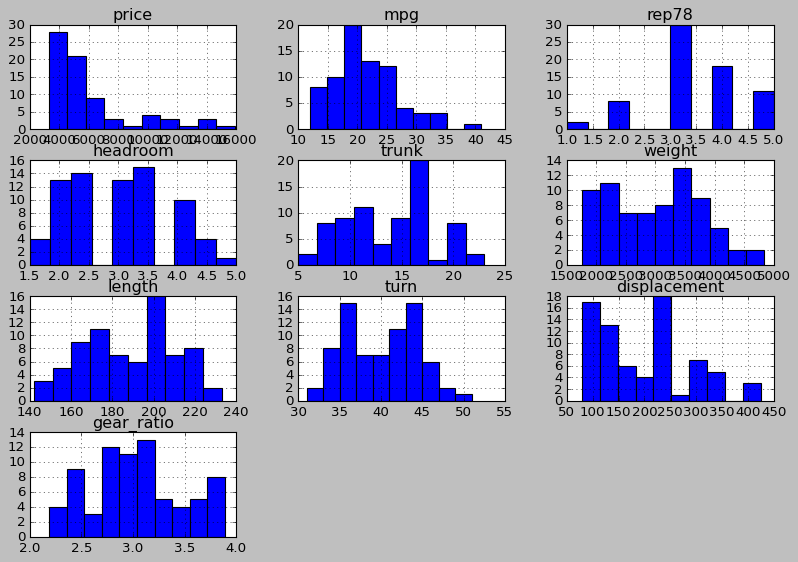

In [ ]:
#dir(auto) # all the stuff you can do on auto :)
#dir(auto.price) #and stuff you can do on price var
auto.hist(figsize=(12,8)); # eg hist

In [ ]:
#auto['make'][0] #py counts from zero!
auto['make'][0:3]
#auto[['weight', 'length']][0:3]   #note that need to double [[ ]]
# can also use loc or iloc to subset/slice on both rows and cols

,make
0,AMC Concord
1,AMC Pacer
2,AMC Spirit


In [ ]:
max(auto['mpg'])
print() #just add space
min(auto['mpg'])
#auto['mpg'].max()
#auto['mpg'].min()
#auto['mpg'].median()
#auto['mpg'].mean()
#auto['mpg'].std()

41

12

In [ ]:
#subsetting on condition
auto.make[auto.mpg<15]
#auto['make'][auto['mpg']<15]
#auto.make[auto.mpg.isin([11,12,13,14])]

,make
10,Cad. Deville
11,Cad. Eldorado
25,Linc. Continental
26,Linc. Mark V
27,Linc. Versailles
29,Merc. Cougar
32,Merc. XR-7
63,Peugeot 604


In [ ]:
auto.make[(auto.mpg<15) | (auto.mpg>40)] #https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior

,make
10,Cad. Deville
11,Cad. Eldorado
25,Linc. Continental
26,Linc. Mark V
27,Linc. Versailles
29,Merc. Cougar
32,Merc. XR-7
63,Peugeot 604
70,VW Diesel


In [ ]:
#subsetting using query
#auto.query("mpg<15  & foreign=='Foreign'")
#auto.query("weight <2000 | length <150")
auto.query("weight + length <2000")

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
23,Ford Fiesta,4389,28,4.0,1.5,9,1800,147,33,98,3.15,Domestic
42,Plym. Champ,4425,34,5.0,2.5,11,1800,157,37,86,2.97,Domestic
61,Honda Civic,4499,28,4.0,2.5,5,1760,149,34,91,3.30,Foreign
64,Renault Le Car,3895,26,3.0,3.0,10,1830,142,34,79,3.72,Foreign


In [ ]:
#len(auto) #stata: count
auto.shape #74 obs, 12 vars

(74, 12)

In [ ]:
auto.dtypes #stata: des ; BUT note no str but object and category

,0
make,object
price,int16
mpg,int16
rep78,float64
headroom,float32
trunk,int16
weight,int16
length,int16
turn,int16
displacement,int16


In [ ]:
auto.select_dtypes(include = ['float32']).head(2)

,headroom,gear_ratio
0,2.5,3.58
1,3.0,2.53


In [ ]:
#auto.filter(like='wei').head(2) #stata: lookfor wei
auto.filter(regex='.*t$').head(2)

,weight,displacement
0,2930,121
1,3350,258


In [ ]:
auto.make[0:5] #note dtype

,make
0,AMC Concord
1,AMC Pacer
2,AMC Spirit
3,Buick Century
4,Buick Electra


In [ ]:
auto.foreign[0:5] #note dtype and categories

,foreign
0,Domestic
1,Domestic
2,Domestic
3,Domestic
4,Domestic


In [ ]:
#auto.describe() #stata: sum
auto.describe().T.round(2) #T just transposes

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.26,2949.50,3291.00,4220.25,5006.50,6332.25,15906.00
mpg,74.0,21.30,5.79,12.00,18.00,20.00,24.75,41.00
rep78,69.0,3.41,0.99,1.00,3.00,3.00,4.00,5.00
headroom,74.0,2.99,0.85,1.50,2.50,3.00,3.50,5.00
trunk,74.0,13.76,4.28,5.00,10.25,14.00,16.75,23.00
weight,74.0,3019.46,777.19,1760.00,2250.00,3190.00,3600.00,4840.00
length,74.0,187.93,22.27,142.00,170.00,192.50,203.75,233.00
turn,74.0,39.65,4.40,31.00,36.00,40.00,43.00,51.00
displacement,74.0,197.30,91.84,79.00,119.00,196.00,245.25,425.00
gear_ratio,74.0,3.01,0.46,2.19,2.73,2.96,3.35,3.89


In [ ]:
auto[['price','mpg','foreign']].groupby('foreign').describe().round(2)
#auto[['price','mpg','foreign']].groupby('foreign').median()

<ipython-input-39-45f4e2254230>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  auto[['price','mpg','foreign']].groupby('foreign').describe().round(2)


price                                                             \
         count     mean      std     min     25%     50%     75%      max   
foreign                                                                     
Domestic  52.0  6072.42  3097.10  3291.0  4185.5  4782.5  6199.5  15906.0   
Foreign   22.0  6384.68  2621.92  3748.0  4521.5  5759.0  7067.5  12990.0   

           mpg                                              
         count   mean   std   min    25%   50%   75%   max  
foreign                                                     
Domestic  52.0  19.83  4.74  12.0  16.75  19.0  22.0  34.0  
Foreign   22.0  24.77  6.61  14.0  21.00  24.5  27.5  41.0

In [ ]:
#auto[['make', 'price', 'mpg', 'rep78', 'foreign']].head(3) #first 3 obs; stata: l make price mpg rep78 foreign in 1/3
auto.sort_values(by='mpg')[['mpg','make','price']][0:3] #3 cars with lowest mpg

,mpg,make,price
26,12,Linc. Mark V,13594
25,12,Linc. Continental,11497
29,14,Merc. Cougar,5379


<Axes: xlabel='rep78'>

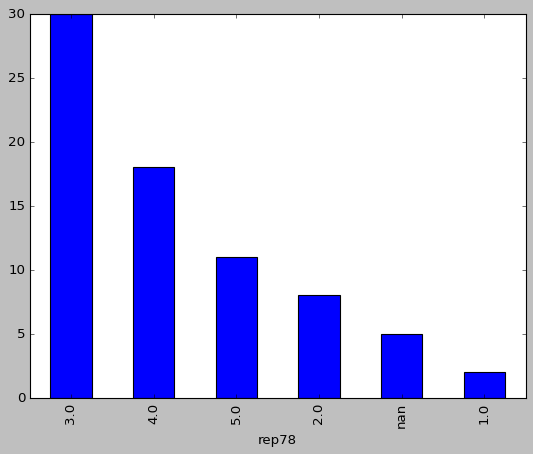

In [ ]:
#auto['rep78'].value_counts() #.nlargest(3)#stata: ta rep78
auto['rep78'].value_counts(dropna=False).plot(kind='bar') #.nlargest(3) #stata can do plot too of tab in ascii
#auto.groupby('rep78').count() #just show counts of rep78 by other vars

In [ ]:
# stata: ta rep78 foreign
pd.crosstab(auto.rep78, auto.foreign) # crosstab
#pd.crosstab(auto.rep78, auto.foreign,normalize='columns') # col prop (normalize columns)
#pd.crosstab(auto.rep78, auto.foreign,normalize='index') #row prop (normalize rows)
#pd.crosstab(auto.rep78, auto.foreign,normalize='all') #cell prop

foreign,Domestic,Foreign
rep78,,
1.0,2,0
2.0,8,0
3.0,27,3
4.0,9,9
5.0,2,9


In [ ]:
#stata: bys foreign: sum mpg
auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign

<ipython-input-43-3f304371aa46>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign


,mpg
foreign,
Domestic,19.83
Foreign,24.77


In [ ]:
pd.pivot_table(auto, index='foreign', values='mpg', aggfunc='mean').round(2)

<ipython-input-44-8fbf41b4d34c>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(auto, index='foreign', values='mpg', aggfunc='mean').round(2)


,mpg
foreign,
Domestic,19.83
Foreign,24.77


In [ ]:
pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)

<ipython-input-45-c69b3462e5a7>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)
<ipython-input-45-c69b3462e5a7>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)
<ipython-input-45-c69b3462e5a7>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(auto, index=['rep78','foreig

median  std   min   max
                  mpg  mpg   mpg   mpg
rep78 foreign                         
1.0   Domestic   21.0  4.2  18.0  24.0
2.0   Domestic   18.0  3.8  14.0  24.0
3.0   Domestic   19.0  4.1  12.0  29.0
      Foreign    23.0  2.5  21.0  26.0
4.0   Domestic   18.0  4.6  14.0  28.0
      Foreign    25.0  2.7  21.0  30.0
5.0   Domestic   32.0  2.8  30.0  34.0
      Foreign    25.0  9.4  17.0  41.0

In [ ]:
#stata: corr mpg wei
#auto.mpg.corr(auto.weight)
auto[['mpg','weight']].corr().round(2) #corr matrix

,mpg,weight
mpg,1.00,-0.81
weight,-0.81,1.00


### manipulating data
btw, often running cell by cell is pain--can just collapse the whole section and then run the whole section at once :)

also may see per dropping, renaming, duplicate rows, outliers:
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

In [ ]:
auto.info() #useful function to see which var has missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 3.1+ KB


In [ ]:
auto['rep78'][0:3]
#print()
#auto['rep78'][0:3].notnull()
#auto['rep78'][0:3].isnull()

,rep78
0,3.0
1,3.0
2,NaN


In [ ]:
# missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

auto['rep78'].value_counts(dropna=False) #doesn't show missing unless explicitly told
#print(auto['rep78'].to_string()) #print all rows
print()
print("count of missing:")
auto['rep78'].isnull().sum() #count missings on rep78 #NaN stands for missing
print()
#auto.loc[auto['rep78'].isnull()]
#auto[auto.rep78.isnull()][['rep78']]
auto[auto.rep78.isnull()][['make', 'price', 'mpg', 'rep78', 'foreign']] #stata: l make price mpg rep78 foreign if rep78==.

,count
rep78,
3.0,30
4.0,18
5.0,11
2.0,8
NaN,5
1.0,2



count of missing:


5

,make,price,mpg,rep78,foreign
2,AMC Spirit,3799,22,NaN,Domestic
6,Buick Opel,4453,26,NaN,Domestic
44,Plym. Sapporo,6486,26,NaN,Domestic
50,Pont. Phoenix,4424,19,NaN,Domestic
63,Peugeot 604,12990,14,NaN,Foreign


In [ ]:
auto2=auto.replace(np.nan, "None") #replace missing (np.nan) with "None"
auto2[auto2["rep78"]=="None"] #list the missing ones
#but in Py best keep missing as np.nan, so in general do sth like:
#auto.replace(-99, np.nan,inplace=True) #replace all -99 with missing
#auto.fillna('-', inplace=True) #replace missing with '-'

#can also get rid of missing just keep finite stuff:
#auto3 = auto[np.isfinite(auto['rep78'])]
#auto3.reset_index(inplace=True) #sometimes things go wrong bc index is not reset!
#len(auto)
#print()
#len(auto3)
##or more concisely for all of dataframe:
#len(auto)
#len(auto.dropna())
#auto.dropna(axis=1).dtypes #drop cols with missing data

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
2,AMC Spirit,3799,22,None,3.0,12,2640,168,35,121,3.08,Domestic
6,Buick Opel,4453,26,None,3.0,10,2230,170,34,304,2.87,Domestic
44,Plym. Sapporo,6486,26,None,1.5,8,2520,182,38,119,3.54,Domestic
50,Pont. Phoenix,4424,19,None,3.5,13,3420,203,43,231,3.08,Domestic
63,Peugeot 604,12990,14,None,3.5,14,3420,192,38,163,3.58,Foreign


In [ ]:
# tostring, destring
auto['mpgST'] = auto.mpg.astype(object) #tostring
auto['mpgNU'] = auto.mpgST.astype(float) #destring
auto[['mpg','mpgST','mpgNU']][0:2]
auto[['mpg','mpgST','mpgNU']].dtypes #.fillna()

,mpg,mpgST,mpgNU
0,22,22,22.0
1,17,17,17.0


,0
mpg,int16
mpgST,object
mpgNU,float64


In [ ]:
#stata: ren mpg newMpg
auto = auto.rename(columns={'mpg': 'newMpg',
                           'make': 'newMake'}) #ren var
auto.dtypes

,0
newMake,object
price,int16
newMpg,int16
rep78,float64
headroom,float32
trunk,int16
weight,int16
length,int16
turn,int16
displacement,int16


In [ ]:
#stata: drop newMpg; but in general better just subset at the beginning
#del auto['newMpg']
auto.drop('newMpg',axis=1) #can specify list of vars in [[]]

,newMake,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,mpgST,mpgNU
0,AMC Concord,4099,3.0,2.5,11,2930,186,40,121,3.58,Domestic,22,22.0
1,AMC Pacer,4749,3.0,3.0,11,3350,173,40,258,2.53,Domestic,17,17.0
2,AMC Spirit,3799,NaN,3.0,12,2640,168,35,121,3.08,Domestic,22,22.0
3,Buick Century,4816,3.0,4.5,16,3250,196,40,196,2.93,Domestic,20,20.0
4,Buick Electra,7827,4.0,4.0,20,4080,222,43,350,2.41,Domestic,15,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,4.0,2.5,12,2160,172,36,97,3.74,Foreign,23,23.0
70,VW Diesel,5397,5.0,3.0,15,2040,155,35,90,3.78,Foreign,41,41.0
71,VW Rabbit,4697,4.0,3.0,15,1930,155,35,89,3.78,Foreign,25,25.0
72,VW Scirocco,6850,4.0,2.0,16,1990,156,36,97,3.78,Foreign,25,25.0


In [ ]:
auto.dtypes

,0
newMake,object
price,int16
newMpg,int16
rep78,float64
headroom,float32
trunk,int16
weight,int16
length,int16
turn,int16
displacement,int16


In [ ]:
#new vars
auto['colOfOnes'] = 1
auto['colOfOnes'][0:3]

,colOfOnes
0,1
1,1
2,1


In [ ]:
auto.at[1,'colOfOnes'] = 10 #https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
auto['colOfOnes'][0:5]

,colOfOnes
0,1
1,10
2,1
3,1
4,1


In [ ]:
auto['colOfOnes'].replace(1,2,inplace=True)
# can also replace more than one at once, eg
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
# see https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

###recode
#mapping = {1:'<10k'
#          ,2:'<10k'
#          ,3:'<10k'
#          ,4:'10-20k'
#          ,5:'20-50k'
#          ,6:'50-100k'
#          ,7:'.1-.5m'
#          ,8:'>.5m'
#                    }
#df=df.assign(rurUrb  = df.X049.map(mapping))


auto['colOfOnes'][0:5]

<ipython-input-57-031f0d4be4b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  auto['colOfOnes'].replace(1,2,inplace=True)


,colOfOnes
0,2
1,10
2,2
3,2
4,2


In [ ]:
# replace on condition
#auto.loc[auto['colOfOnes'] <5, 'colOfOnes']  = '22'
auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'
auto[['foreign','colOfOnes']][48:53]

<ipython-input-58-efce6574b984>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'


,foreign,colOfOnes
48,Domestic,100
49,Domestic,100
50,Domestic,100
51,Domestic,100
52,Foreign,2


In [ ]:
#stata: by sort: egen mean count #stata: collapse
# https://stackoverflow.com/questions/50068443/collapse-rows-in-pandas-dataframe-with-different-logic-per-column
auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean', 'count'])

<ipython-input-59-0d74b0394c32>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean', 'count'])


weight            length      
                 mean count        mean count
foreign                                      
Domestic  3317.115385    52  196.134615    52
Foreign   2315.909091    22  168.545455    22

In [ ]:
#lets unpack a bit as this groupby agg may be non-intuitive
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
df
#and for a real world example using groupby agg see
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

,A,B,C
0,1,1,0.112130
1,1,2,-0.199642
2,2,3,0.054367
3,2,4,0.016318


In [ ]:
df.groupby('A').agg('min')

,B,C
A,,
1,1,-0.199642
2,3,0.016318


In [ ]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2 -0.199642  0.112130
2   3   4  0.016318  0.054367

In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B             C
  min max       sum
A                  
1   1   2 -0.087512
2   3   4  0.070685

In [ ]:
#very useful can get the groups
g=auto[['mpg','foreign']].groupby('foreign')
g.get_group('Domestic').head(1)
g.get_group('Foreign').head(1)

KeyError: "['mpg'] not in index"

### labelling

i'd just have nice descriptive var names, ditch var labels; and for val labels just have another string var that has labels instead of values; BUT see a workaround with dict below for printing var labels from stata


other ideas
https://stackoverflow.com/questions/60498830/view-stata-variable-labels-in-pandas ;
https://stackoverflow.com/questions/22500108/value-label-in-pandas ;
https://stackoverflow.com/questions/60805100/any-way-to-label-variables-in-python


LATER/TODO--see pandas docs

Value Labels: Python doesn't have value labels, but it has something even more useful, dicts.  
(I suspect that, under the covers, Stata is using hashes, which is what dicts really are, for value labels). The idea is to use a dict to map some or all of the values for a variable.



In [ ]:
# var labels #on stata iterator in py: https://kylebarron.dev/blog/reading-stata-files-with-python
pd.read_stata('auto.dta', iterator=True).variable_labels() #return stata reader obj
#itr.variable_labels()

# can also return data label and val labels
# pandas.io.stata.StataReader.data_label
# pandas.io.stata.StataReader.value_labels

### merge

remember, difficult and tedious but extremely useful

merge on geo (county, muni, school id, etc), time (year, day, hour, etc), or on both (panel)

and anything else that you can find in 2 different datasets, eg occ code

REFS:

https://stackoverflow.com/questions/53645882/pandas-merging-101

http://pandas.pydata.org/pandas-docs/stable/merging.html

https://realpython.com/pandas-merge-join-and-concat/

https://sparkbyexamples.com/pandas/pandas-merge-dataframes-explained-examples/




In [ ]:
#make some dataset
d1 = pd.DataFrame({'id': ['1',  '2',  '3',  '4'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '5', '6'],
                   'A': ['A4', 'A5', 'A6', 'A7'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

In [ ]:
mergedOuter = pd.merge(d1, d2, how='outer', on=['id'],indicator=True) #outer=keep all
mergedOuter

In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
#do value counts on _merge and list the merge var (key,id) for these that failed merge
#be esp careful if both left and right didnt merge fully

mergedOuter['_merge'].value_counts() #.plot(kind='barh')
mergedOuter['id'][mergedOuter['_merge']=='left_only']
mergedOuter['id'][mergedOuter['_merge']=='right_only']
#pd.crosstab(mergedOuter["_merge"], mergedOuter["id"])

#clumsy way to check things around:
#mergedOuter.isnull().any() #double-check if any mismatches-may first look for rows with nulls
#mergedOuter[mergedOuter['A_x'].isnull()] #zoom in on A_x: aha so these with id 5 and 6 are missing on A_x
#mergedOuter.loc[mergedOuter['A_x'].isnull(), 'id'].unique() #convinently list ids that are missing on A_x
# 5 and 6, and we know that A_x comes from d1 and d1 ids are 1-4, so 5-6 must be missing, so we're good

In [ ]:
#another way
set(d1['id']).difference(set(d2['id'])) #.intersection(set(d1['id'])))


In [ ]:
mergedInner = pd.merge(d1, d2, how='inner', on=['id']) #inner=keep match
mergedInner

In [ ]:
mergedLeft = pd.merge(d1, d2, how='left', on=['id']) #left=keep all from 1st
mergedLeft

In [ ]:
mergedRight = pd.merge(d1, d2, how='right', on=['id']) #right=keep all from 2nd
mergedRight

In [ ]:
njCounties.to_csv('njCounties.csv')

In [ ]:
#real world example

#get 1st dataset: counties and population
njCounties=pd.read_csv("https://raw.githubusercontent.com/theaok/data/main/njCounties.csv")

# have a look at the data and replace val
#njCounties.head()
#njCounties.dtypes
#njCounties.describe().round(2)
njCounties[['COUNTY','POPDEN2010']]

#njCounties['POPDEN2010'].replace(450,450.9,inplace=True) #just an example

#njCounties[['COUNTY','POPDEN2010']]
#njCounties['POPDEN2010'].hist(bins=5)
#njCounties.boxplot(column='POPDEN2010',by='REGION'), plt.show()

#fig, ax = plt.subplots()
#ax.scatter(njCounties['POPDEN2010'],njCounties['POP2000'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('pop', fontsize=16)

#for i, txt in enumerate(njCounties['COUNTY']):
#    ax.annotate(txt, (njCounties['POPDEN2010'][i],njCounties['POP2000'][i]),fontsize=8)



In [ ]:
#manipulating strings

#njCounties['COUNTY_LAB'].str[:-7]
#njCounties['COUNTY_LAB'].str.len() #https://www.geeksforgeeks.org/python-pandas-series-str-len/

#https://towardsdatascience.com/pandas-remove-unwanted-parts-from-strings-92ac881e60a2
njCounties['COUNTY_LAB'].str.replace(' County','')

In [ ]:
#2nd dataset: counties and housing prices
urllib.request.urlretrieve('https://sites.google.com/site/adamokuliczkozaryn/gis_int/all_homes.csv','zillow.csv')
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


In [ ]:
#note that sometimes strangely enough strings that apparently do match dont merge, white space to blame!
njCounties['COUNTY']=njCounties['COUNTY'].str.strip()
zil1['COUNTY']=zil1['COUNTY'].str.strip()

In [ ]:
#merge
njC1 = pd.merge(njCounties,zil1, on='COUNTY',how='outer',indicator=True)
#njC1.dtypes
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(njC1['POPDEN2010'],njC1['Dec 2012'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('hou pri', fontsize=16)
#for i, txt in enumerate(njC1['COUNTY']):
#    ax.annotate(txt, (njC1['POPDEN2010'][i],njC1['Dec 2012'][i]),fontsize=8)

#### many to one; and more examples

REF:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

note its a whole free data science free online book with free notebooks :) may skim through other chapters etc

may also see:
https://stackoverflow.com/questions/44842458/merging-pandas-columns-one-to-many

In [ ]:
# many to one

#first get some data, and start with one to one merge
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2,how='outer',indicator=True)

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3,df4) #so group is many in df3 to one in df4

In [ ]:
del df3['_merge']
pd.merge(df3, df4,how='outer',indicator=True) #note same syntax as for one to one

In [ ]:
#another real world example

#first get data, note alternative to urllib retreive:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

pop.head()
areas.head()
abbrevs.head()

In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation',indicator=True)
merged.head(3)

In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
merged['_merge'].value_counts() #.plot(kind='barh') #left a problem, many 96
#!! and then step by step do all investigations in this para!!
#merged['state/region'][merged['_merge']=='left_only'] #again many
#merged['state/region'][merged['_merge']=='left_only'].value_counts() #aha 48 PR and USA
#merged['year'][merged['_merge']=='left_only'].value_counts() #hmm like 4 per yr
#merged.query("year == 1991 & _merge == 'left_only'") #lets zoom in
#ok so we got PR and US and bunch of years for ages total and under18
#make sure stuff like that wasnt in the right dataset:
#merged['abbreviation'][merged['_merge']=='both'].unique() #ya no PR or USA there

#merged['state'][merged['_merge']=='right_only']
#pd.crosstab(merged["state/region"],merged["_merge"])  #### this is helpful! always do it!!! unless super many ids

#clumsy way:
# again and again super important to investigate what happened!!
#merged.isnull().any() #double-check if any mismatches-look for rows with nulls
#merged[merged['population'].isnull()] #aha! all PR <2000 and state entries also null, so there was no corresponding entry in the abbrevs key! let's see which regions dont match
# merged.loc[merged['state'].isnull(), 'state/region'].unique() #ta da! PR and USA are not in abbrevs key

In [ ]:
#merged.query("year == 2010 & ages == 'total'") # a neat way to subset!!

### reshape


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html
#pd.wide_to_long(df, ['x'], i='i', j='j')

#or maybe better pivot:
#https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
#https://www.statology.org/pandas-long-to-wide/
#https://towardsdatascience.com/reshape-pandas-dataframe-with-pivot-table-in-python-tutorial-and-visualization-2248c2012a31

## APIs (pulling data straight from online); and basic graphs
Graphs are the best way to understand data and convey information! And Python comes with two handy packages to pull data straight from Fed (for students interested in domestic stuff) and from World Bank (for folks with intl interests).

There's a bunch of others:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

#### Fed/FRED

Let's start with Fed, can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there, or better yet pull data straight from within Py, just note the code "PAYEMS" for the series from the website to use in Py call.

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) # PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS
df #print the data

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc

How about job losses? On https://fred.stlouisfed.org/categories search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar and then atl shot up; but remember about scaling of y axis!, if you make both same scale:


In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

#### World Bank
can actually search from within Py :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

In [ ]:
#dat
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")

# VIS ----------------------------------------

this is the core of the class; we'll spend the rest of it on vis

we'll mostly base it on galleries as listed in syllabus:

https://theaok.github.io/vis/#galleries

<br>
we first cover vis tables, then setup/custimozation/tailoring with matplotlib and then main part of the course: examples/galleries by theme/approach

## [feb8] vis tables
before getting into actual graphs we start by coloring tables :)
(and can export to xls, tex, html)

REF:
https://pandas.pydata.org/docs/user_guide/style.html#

In [ ]:
urllib.request.urlretrieve("https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download", "auto.dta")
auto=pd.read_stata('auto.dta')

In [ ]:
auto[:10].style.background_gradient(cmap='Greens') #RdYlGn #https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
auto[:10].style.set_precision(0).background_gradient(cmap='Greens') #much cleaner! but note that little oversimplified headroom

In [ ]:
auto[:5].style.text_gradient(cmap='Blues') #maybe better more delicate

In [ ]:
auto[:10].style.bar(subset=['mpg', 'price'], color='#d65f5f') #bar chart
# per html col visualizer (and rgb equivalents) eg htmlcolorcodes.com

In [ ]:
#and can export it in html .render() and download onto hard drive
html=auto.style.background_gradient(cmap="hot").render() #Reds Greens
f = open('auto.html','w'); f.write(html); f.close() #can have multiple commands in one line with ';'
files.download('auto.html') #your os will probably prompt you to open in webbrowser, do it

###to excel (i'd just stick with html) https://betterdatascience.com/style-pandas-dataframes/
#auto.style.background_gradient(cmap="hot").to_excel("table.xlsx"); files.download('table.xlsx')

In [ ]:
#can color any table output, say corr matrix
auto.corr().round(2)

In [ ]:
sns.heatmap(auto.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!

## basics / setup:  mpl

mpl (matplotlib) is Py main vis library, and other libraries (eg pandas, seaborn) run on the top of it; it gives you max power and customization

graphing is easy in Py, but often want that extra  customization and be able to tailor all the parts--we'll start with a look under the hood to have an awesome flexibility with matplotlib

having covered setup/customization/tailoring with matplotlib we will then move to main examples by theme in next sections--note: all graphs are native matplotlib unless indicated otherwhise

in general, i'm trying to stick with native matplotlib as much as practicable; wherever handy/useful i supplement with pandas and seaborn

MAIN REF:
https://matplotlib.org/stable/gallery/index.html


REFS:

neat and useful
https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html

dry and not so useful
https://wesmckinney.com/book/plotting-and-visualization.html

great for fine tuning/customization
https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

another one:
https://aeturrell.github.io/coding-for-economists/vis-matplotlib.html

<br><br>

cheatsheets/handouts:

https://matplotlib.org/cheatsheets/

https://www.datacamp.com/cheat-sheet/matplotlib-cheat-sheet-plotting-in-python


<br>
sidenote on  pandas graphs:
<font size="1">
since we started the class with pandas for data management, we could also use pandas for vis, syntax is easy/user-friendly; BUT since pandas just runs on the top of matplotlib and  deeper customization is done in matplotlib, we will just stick with matplotlib as much as possible!
pandas has one main plot function that can produce all sorts of plots: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
and see pandas galleries https://theaok.github.io/vis/#galleries
</font>

In [ ]:
#!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
#auto=pd.read_stata('auto.dta'); auto.head(2)
auto=pd.read_stata('https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download')

In [ ]:
#the first thing to pay attention to is magics and themes/styles--see the 1st code cell

In [ ]:
#remember we did: import matplotlib.pyplot as plt
#and so the fastest/easiest is to do
#plt.PLOTTYPE(VARS) eg:
#plt.hist(auto.mpg)
#plt.scatter(auto.price,auto.weight)
#plt.barh(auto.make,auto.mpg)

#sure do use that, simplicity is the king, but only for playing/quick vis
#proper vis you want to tailor/customize
#and final vis you want to organize, label, and polish
#for all of that use the classic setup in next cell

In [ ]:
#main options/customizations (more later in advanced matplotlib)
#detailed ref per customization: https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb

#oneliner quick setup:
fig, ax = plt.subplots(figsize = (6,4)) #fig=overall environemnt; ax(s)=actual plot(s)

#ax.set_title('my title')
ax.set_xlabel("mpg")  #remember always all axes must be labelled
ax.set_ylabel("count")
#put some plot in it, eg:
ax.hist(auto.mpg,alpha=.5,bins=20,color='blue');
#ax.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
#ax.legend(["blah"],loc=0) #0 soft decides; 1-4 corners; more options
#ax.set_ylim([0,50])
#ax.set_xlim([0,50])
#ax.set_xticks([10, 20, 50])
#ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$'], fontsize=18)
#plt.gcf().canvas.get_supported_filetypes() #list supported output/save formats
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as
#plt.show() #may need it depends on os/interface/browser #semilcolon supreses intermediary output

In [ ]:
#overlays; super simple: just keep on adding plots
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("mpg")
ax.set_ylabel("count")
#plot1
ax.hist(auto.mpg[auto.foreign=="Domestic"],label="D", alpha=1,bins=20,color='blue')
#plot2
ax.hist(auto.mpg[auto.foreign=="Foreign"] ,label="F", alpha=.5,bins=20,color='yellow')
ax.legend();

In [ ]:
#inset figure love it! looks like nature or science or pnas etc
# instead of oneliner setup, step by step:
fig = plt.figure(figsize=(9,6)) #plots in matplotlib reside within a Figure object
# add axes: left, bottom, width, height (range 0 to 1) #ax = plt.axes() #make axes
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax2 = fig.add_axes([0.6, 0.17, 0.3, 0.2]) # inset axes
# main figure
ax1.scatter(auto.price,auto.weight, c='black', s=30, alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
# inset
ax2.hist(auto.mpg,alpha=.5,bins=20,color='blue')
ax2.set_xlabel('inset x')
ax2.set_ylabel('inset y')
ax2.set_title('inset title');

In [ ]:
#subplots
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True) #1row2col
axs[0].hist(auto.mpg, bins=7) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
#btw can do categorical var hist too: auto.rep78.value_counts() #same as bar chart
axs[1].hist(auto.rep78)
axs[0].set_ylabel('count')
axs[0].set_xlabel('mpg')
axs[1].set_xlabel('rep78');

##alt
#fig = plt.figure()
#plt.subplots_adjust(hspace=0.2) #adjust horiz space between graphs
#ax1 = plt.subplot(211, title='foreign') #2x1grid 1st graph
#plt.scatter(auto[auto.foreign=='Foreign'].weight, auto[auto.foreign=='Foreign'].length)
#ax2 = plt.subplot(212, sharex=ax1, sharey=ax1, title='doemstic') #2x1grid 2nd graph
#plt.scatter(auto[auto.foreign=='Domestic'].weight, auto[auto.foreign=='Domestic'].length)
#xticklabels = ax1.get_xticklabels() #+ ax2.get_xticklabels() #drop labelling of 1st x axis
#plt.setp(xticklabels, visible=False)

### subplots with a loop (facet/trellis)
often want to crank out a bunch on the fly (not one by one, by hand)

(a sidenote: subplots in pandas
https://www.statology.org/pandas-groupby-plot/)

In [ ]:
#say we want to make subplots for each level of rep78
auto.rep78.value_counts()
g = auto.groupby('rep78') #first we subset data into n groups
print ('\n hi adam, so we have', g.ngroups, 'groups')

In [ ]:
#a for loop; note: you must indent!
#above we generated object g with n groups of dataframes--lets have a look--we can pull them out with a loop
for v,d in g: #for each group there are 2 elements:
  print(v) #v is just a level/value of the subset var
  d.head(2) #d is the actual subset dataframe for the corresponding level of the subset var

In [ ]:
for i, (v, d) in enumerate(g): #enumerate would produce a counter i=0,1,...,n
  print(i,v) #print counter and values of the grouping variable; we dont pull the actual dataframes (d)

In [ ]:
#start figure with a usual oneliner, just use g.ngroups (5) for number of columns
fig, axs = plt.subplots(1,g.ngroups, sharex=True, sharey=True, tight_layout=True, figsize=(12, 4)) #1row n cols
for i, (v, d) in enumerate(g): #and then use the for loop to make n subplots
  axs[i].hist(d['mpg']) #on each iteration an axs will be generated: 1,2,...,n; and subset dataframe d will be used
  axs[i].set_title(v) #title each subplot with a level of the grouping var
axs[0].set_ylabel('count') #no indentation, so run it only once--the loop ended line above (last line indented)
axs[2].set_xlabel('mpg')
axs[2].text(23, 11.5, r'rep78', fontsize=12); #a handy way to stick text exactly where you want

## [feb15] distribution / histograms                         
when you have one var and want to show its distribution/spread; or many vars (subgroups of a var): bunch of graphs, one for each var (subgroup)<br>

mostly hist v boxplot: hist more info, but boxplot cleaner esp for comparisons<br>

note: varieties of graphs here just to practice different setups, especially subplots; in your work be parsimonious! and be interesting: ask the so what question!


In [ ]:
fig, ax = plt.subplots(figsize = (3, 3)); ax.hist(auto.mpg);
#bins=7 edgecolor="black" color="green" color="#69b3a2" histtype=u'step' alpha=.5
###pandas: auto[['price']].plot(kind='hist', bins=5)

In [ ]:
# in general very useful to additionally mark interesting stuff in a graph (more on this later)
fig, ax = plt.subplots(figsize = (4, 3))
ax.hist(auto.mpg)
medMpg=auto.mpg.median()
ax.axvline(medMpg, color="red", ls="--", label="median mpg") # or say med mpg in 1990, in ENG, etc
ax.set_xlabel('mpg')
ax.set_ylabel('count')
ax.legend();

In [ ]:
#density/kde plot #pandas
fig, ax = plt.subplots();auto.mpg.plot.kde(bw_method=0.4,ax=ax);ax.set_xlabel('mpg'); #small bandwidth may overfit "wiggly line"; big may underfit

In [ ]:
#boxplot
fig, ax = plt.subplots(); ax.boxplot(auto.mpg,vert=False); ax.set_yticklabels('');ax.set_xlabel('mpg');

In [ ]:
#boxplot helps id ouliers easily: pts outside of whisker caps: lets list them
auto[auto.mpg>34]

In [ ]:
#boxplot v histogram side-by-side comparison: similar info and cleaner (but less info)

fig, axs = plt.subplots(2, 1, sharex=True, tight_layout=True, figsize = (6, 3),
    gridspec_kw={'height_ratios': [1, 3]}) #2row1col 1:3 height ratio #note indentation bc it continues from line before
axs[0].boxplot(auto.mpg, vert=False, medianprops=dict(linewidth=3,color='firebrick'),
     showbox=False, showcaps=False) #tufte style
axs[0].set_yticklabels('')
axs[1].hist(auto.mpg, bins=15) #edgecolor="black" ,color="green" histtype=u'step' alpha=.5
axs[1].set_xlabel('mpg')
axs[1].set_ylabel('count');
#boxplot customization: https://matplotlib.org/stable/gallery/statistics/bxp.html

#side-by-side comparison with 1row3col subplots
#fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize = (4, 5),
#    gridspec_kw={'width_ratios': [1,1,3]})
#axs[0].boxplot(auto.mpg)
#axs[1].boxplot(auto.mpg,showbox=False, showcaps=False)
#axs[2].hist(auto.mpg, bins=20,orientation='horizontal',alpha=.2)
#axs[0].set_ylabel('mpg')
#axs[0].set_xlabel('default')
#axs[1].set_xlabel('tufte style')
#axs[2].set_xlabel('count')
#axs[0].set_xticklabels('')
#axs[1].set_xticklabels('')
#plt.savefig('fig.pdf'); files.download('fig.pdf'); #love the graph, gotta save it

In [ ]:
#hist: one var by levels of another var
fig, ax = plt.subplots(figsize = (6,4))
ax.set_xlabel("mpg")
ax.set_ylabel("count")
ax.hist(auto.mpg[auto.foreign=="Domestic"],label="D", alpha=1,bins=20,color='blue')
ax.hist(auto.mpg[auto.foreign=="Foreign"] ,label="F", alpha=.5,bins=20,color='yellow')
ax.legend();
###pandas:
#auto['mpg'].groupby(auto['foreign']).hist(alpha=.6,legend=True);
#auto.groupby(by=auto.foreign)['mpg'] #alt groupby meth

#multiple vars in 1 (usually not super useful)
#fig, ax = plt.subplots(figsize = (3, 3))
#ax.hist(auto.headroom)
#ax.hist(auto.rep78,alpha=.7)
#ax.set_ylabel('count')
#ax.legend(('headroom', 'rep78'), loc='upper left');

In [ ]:
#density/kde: one var by levels of another one; hist way more info! #pandas
fig, ax = plt.subplots();auto.groupby(auto.foreign)['mpg'].plot(kind='density', legend=True,ax=ax);ax.set_xlabel('mpg');

In [ ]:
#boxplot: one var by levels of another var; boxplot maybe better (cleaner!) for comparisons than hist
#insight: of course foreign have better mean mpg (and max (>35))
#(and middle 50% of each distribution pretty much non-overlapping)
fig1, ax1 = plt.subplots(figsize = (4, 4))
ax1.boxplot(auto.mpg[auto.foreign=="Domestic"], positions=[1]) #only one subplot; but with 2 positions
ax1.boxplot(auto.mpg[auto.foreign=="Foreign"],  positions=[2])
plt.xticks([1, 2], ['domestic', 'foreign']);
#TODO label y axis

#or split with groupby like this:
#g=auto[['mpg','foreign']].groupby('foreign')
#plt.boxplot([g.get_group('Domestic')['mpg'],g.get_group('Foreign')['mpg']]);

#matplotlib v pandas and seaborn--easy to subset on categories there
#fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True,
#    gridspec_kw={'width_ratios': [1,1,1]}) #note indentation bc it continues from line before
#axs[0].boxplot(auto.mpg[auto.foreign=="Domestic"], positions=[1]) #just cp from above
#axs[0].boxplot(auto.mpg[auto.foreign=="Foreign"], positions=[2])
#auto.boxplot(column='mpg',by='foreign',ax=axs[1]) #adding subplots with ax= #pandas
#sns.boxplot(x='foreign', y='mpg', data=auto,ax=axs[2]) #here too #seaborn
#axs[0].set_ylabel('mpg')
#axs[2].set_ylabel('')
#axs[1].set_xlabel('pandas')
#axs[2].set_xlabel('seaborn')
#axs[1].set_title('')
#fig.suptitle('');

In [ ]:
#subset by many categories, automate with a loop
g = auto.groupby('rep78')
fig, axs = plt.subplots(1,g.ngroups, sharey=True, tight_layout=True, figsize=(6, 4))
for i, (grp, d) in enumerate(g):
  axs[i].boxplot(d['mpg'])
  axs[i].set_title(grp)
  axs[i].set_xticklabels('')
#TODO label y axis and titles just as in basics / setup with mpl
###pandas: auto.boxplot(column='mpg',by='rep78',vert=False), plt.show()

In [ ]:
#violinplots https://www.scaler.com/topics/matplotlib/violin-plot-matplotlib/
# cool examples: https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples/
#fig, axs = plt.subplots(1, 2, figsize = (3, 3), sharey=True, tight_layout=True,
#    gridspec_kw={'width_ratios': [1,2]})
#axs[0].violinplot(auto.mpg)
#axs[0].set_ylabel('mpg')
#axs[1].violinplot(auto.mpg[auto.foreign=="Domestic"], positions=[1])
#axs[1].violinplot(auto.mpg[auto.foreign=="Foreign"], positions=[2])
#plt.xticks([1, 2], ['domestic', 'foreign']);

# and then there's ridgline, but the code is like sending a rocket to the outer space
# https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/

 in general, always good to know distribution of your key vars,  so once you load the data,
 one of the first things to do is to subset data to key vars [rule of simplicity/cleanliness], and get histograms for all of them--traditionally you'd get basic sum stats like mean median mode std dev and range--but with hist you get all of that and more in a vis that's easier and faster to comprehend :)

In [ ]:
aut=auto[['price','mpg','weight','length','rep78']] #subset to key vars
fig, ax = plt.subplots(1,5,sharey=True,tight_layout=True ,figsize = (20, 3))
for i,d in enumerate(aut):
  ax[i].hist(aut[d])
  ax[i].set_title(d)
###alternative setup:
#aut.hist(sharey=True,figsize=(30,3),layout=(1,5)); #note different setup from earlier
#put options into graph as opposed to earlier upfront; fligured them out with autocomplete feature:
#just put cursor into aut.hist() and it gives you options

## ranking / bar charts
some of the most useful and most underutilized vis--use them a lot

more versatility here than with distributions that are only about one var (unless multiple distributions and/or by groups)

simplest bar chart is 2 vars list of values, but do calc sum stats such as mean and subset by other vars!

with bar charts can show a ton of relationships between multiple vars, again: not only raw values for a var, but also sum stats: mean, median, std, etc


In [ ]:
#bar chart is a great replacement for a list, even say upto 100 elements; always sort
#fig, ax = plt.subplots(figsize = (3, 3)); ax.bar(auto.foreign,auto.mpg);
auto = auto.sort_values('mpg') #usually useful to sort on var of interest
fig, ax = plt.subplots(tight_layout=True, figsize=(4,12))
ax.barh(auto.make,auto.mpg, height = 1, alpha=1, edgecolor='none')
ax.set_xticks([10, 20, 30, 40]) #be clean/parsimonious
ax.grid(axis='x' , color ='grey', linestyle ='-', linewidth = 0.9,alpha = 0.9);

In [ ]:
auto=auto.sort_values(['mpg', 'price'], ascending=[True, True])
fig, axs = plt.subplots(1, 2, figsize = (10, 10), sharey=True, tight_layout=True,
    gridspec_kw={'width_ratios': [1,1]})
axs[0].barh(auto.make,auto.mpg)
axs[0].set_title('mpg')
axs[1].barh(auto.make,auto.price)
axs[1].set_title('price')
axs[0].grid(axis='x' , color ='grey', linestyle ='-', linewidth = 0.9,alpha = 0.9)
axs[1].grid(axis='x' , color ='grey', linestyle ='-', linewidth = 0.9,alpha = 0.9);
#axs[0].grid(axis='y' , color ='grey', linestyle ='-', linewidth = 8,alpha = 0.3);

In [ ]:
auto[['rep78','foreign']]

In [ ]:
#useful to calc sum stats such as mean or count
mpg_rep78=auto['mpg'].groupby(auto['rep78']).agg('mean')

fig, ax = plt.subplots(figsize = (3, 3))
ax.barh(mpg_rep78.index,mpg_rep78.mpg)

In [ ]:
a=auto.groupby(['foreign','rep78']).agg('mean').reset_index() #.mpg
a

bar_width = 0.35

fig, ax = plt.subplots(figsize = (3, 3))
ax.bar(a.rep78[a.foreign=='Domestic'],a.mpg[a.foreign=='Domestic'],bar_width,label='D')
ax.bar(a.rep78[a.foreign=='Foreign']+bar_width,a.mpg[a.foreign=='Foreign'],bar_width,label='F') #or could overlay like in setup example
ax.legend(loc=2,prop={'size': 8})

In [ ]:
#useful to calc sum stats such as mean and have error bars
#sum stats-easily done in seaborn #note that fewer obs like on 5, bigger CI
fig, ax = plt.subplots(figsize=(5,3))
ax = sns.barplot(x="rep78", y="mpg", data=auto, estimator=np.mean, ci=95, capsize=.1, color='lightblue')

#of course can do that and more in mpl, for afficionados:
#https://www.statology.org/error-bars-python/
#https://pythonforundergradengineers.com/python-matplotlib-error-bars.html or https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/

In [ ]:
#summary stats such as mean of var on y axis by categories on x axis
#and possibly 3rd var as colors of bars is a *true workhorse*--use it a lot,
#should have at least several of those--they can really get some insights
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=auto, y='mpg', x='rep78',  hue='foreign',estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);

In [ ]:
# flip x with hue: helps answer differnt question and find different insights

# previously the graph focuses on domestic-foreign diff within each rep78:
# rep78 1,2: no foreign; rep78 3,4: foreign higher mpg than domestic
# and rep78 5th cat, the other way round: higher mpg for domestic

#the 2nd setup focuses on comparisons within each domestic and foreign and across rep78:
# mpg on rep78 lower cat for domestic is much smaller than rep78 5
# among foreign cars not much difference across cat or rep78
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=auto, y='mpg', x='foreign', hue='rep78',palette="Blues",estimator=np.mean, ci=95, capsize=.1, orient='v',ax=ax);
#note have palette if many cat, otherwhise optical illusion

In [ ]:
#pandas bar charts; skip; just use matplotlib or seaborn
#ax=auto[['make', 'price']][0:3].plot(kind='barh')
#ax.set_yticklabels(auto.make);
#ax=auto[['make', 'price','weight']][0:5].plot(kind='barh') #stacked=True
#ax.set_yticklabels(auto.make);

#btw for a categorical variable histogram looks like a bar chart, but bar chart has typivally >= 2vars, hist typically =1var
#auto.rep78.value_counts().plot(kind='barh') # counts/freq by cat #pandas
#fig, ax = plt.subplots(figsize = (3, 3)); ax.hist(auto.rep78,orientation='horizontal');

In [ ]:
#relationships: for continuous vars (at least ordinal) do scatterplots; for nominal vars do crosstabs:
pd.crosstab(auto["rep78"], auto["foreign"])

In [ ]:
#and can plot them with bar charts

a=auto.groupby(['foreign','rep78']).agg('count').reset_index() #.mpg
a

bar_width = 0.35

fig, ax = plt.subplots(figsize = (3, 3))
ax.barh(a.rep78[a.foreign=='Domestic'],a.mpg[a.foreign=='Domestic'],bar_width,label='D')
ax.barh(a.rep78[a.foreign=='Foreign'],a.mpg[a.foreign=='Foreign'],left=a.mpg[a.foreign=='Domestic'],label='F') #or could overlay like in setup example
ax.legend(loc=1,prop={'size': 8})

#or in pandas
#pd.crosstab(auto["rep78"], auto["foreign"]).plot(kind='barh')
pd.crosstab(auto["rep78"], auto["foreign"]).plot(kind='barh',stacked=True);

## lineplots / time series data

when you have data over time, the first thing is to plot it as we did with API data (WB, FRED) earlier

several variations on lineplots follow using time series data

so unlike distribution and ranking, which everyone will use, this is only for time series data



In [ ]:
#first make some data
df=pd.DataFrame({'x_values': range(1,11), 'y1_values': np.random.randn(10), 'y2_values': np.random.randn(10)+range(1,11), 'y3_values': np.random.randn(10)+range(11,21) })
#multiple line plots
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
ax.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
ax.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
ax.legend();

In [ ]:
#LATER have lineplot with 2 y axes

In [ ]:
#stacked area, eg worth of each of 3 big tech that adds up to total worth of all 3
#make some data:
x=range(1,6); y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
fig, ax = plt.subplots(figsize=(6, 4))
ax.stackplot(x,y, labels=['A','B','C'])
ax.legend(loc='upper left');

In [ ]:
#percentage stacked area, eg market share--always adds up to 100,
#but share of each company evolves over time
#make some data:
data = pd.DataFrame({  'group_A':[1,4,6,8,9], 'group_B':[2,24,7,10,12], 'group_C':[2,8,5,10,6], }, index=range(1,6))
data_perc = data.divide(data.sum(axis=1), axis=0) #transform data from raw to percent

fig, ax = plt.subplots(figsize=(6, 4))
ax.stackplot(range(1,6),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['A','B','C'])
ax.legend(loc='upper left');
#ax.margins(0,0)
#ax.title('100 % stacked area chart');

## [feb22] relationship / scatterplots

especially for continuous vars or at least ordinal; note can have 3 vars in scatterplots, 3rd being color (or size or marker)

In [ ]:
#basic scatterplot
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(auto.weight,auto.price, c='black', s=130, alpha=0.3);

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
s=ax.scatter(auto.weight,auto.price, c=auto.length, cmap='RdYlGn_r', s=70,alpha=0.7,edgecolors="black")
fig.colorbar(s, anchor=(0, 0), shrink=1);
#a see http://stats.stackexchange.com/questions/11984/how-can-i-remove-the-z-order-bias-of-a-coloured-scatter-plot
###btw could add 4th var as circle radius:
#https://seaborn.pydata.org/examples/scatterplot_sizes.html
#but its mess--need fewer cat! and need like RdYlGn

In [ ]:
#label points, clunky, don't worry about it, just label by hand few points you need or use interactive plotly (later class)
#https://stackoverflow.com/questions/14432557/scatter-plot-with-different-text-at-each-data-point
#https://datascienceparichay.com/article/matplotlib-label-points-on-scatter-plot/
#https://dataplotplus.com/add-text-labels-scatter-plot-in-python/
fig, ax = plt.subplots(figsize=(16,8)) #make it wide so can read labels better

#KLUDGE
#must sort on index, likely enumerate (0,1,2,...) must be same as index; and check for missing info! may be a problem too
# and then double check scatter plot labels for integrity; be careful!
#TODO/LATER do it better, maybe have key var as index, the one that goes on plt as txt
auto=auto.sort_index()
auto[['make','weight','mpg']].info()

ax.scatter(auto['weight'],auto['mpg'],s=2)

for i, txt in enumerate(auto['make']):
    ax.annotate(txt, (auto['weight'][i],auto['mpg'][i]),fontsize=10)
#at least can id outliers; still many overlap, later we will cover zooming and popups

#LATER/MAYBE can also jitter points
#https://stackoverflow.com/questions/53093560/python-scatter-plot-overlapping-data
#https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/bivariate-exploration-of-data/overplotting-transparency-and-jitter
#https://www.python-graph-gallery.com/134-how-to-avoid-overplotting-with-python

#another way
#def label_point_orig(x, y, val, ax):
#    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#    print(a)
#    for i, point in a.iterrows():
#        ax.text(point['x'], point['y'], str(point['val']),fontsize=7, color='black')
#
#plt.scatter(auto.weight, auto.length,s=5)
#label_point_orig(auto.weight, auto.length, auto.make, plt)

In [ ]:
#fancy! can automatically adjust text with this package
!pip install adjustText
from adjustText import adjust_text
#https://adjusttext.readthedocs.io/en/latest/Examples.html
#https://www.python-graph-gallery.com/web-text-repel-with-matplotlib

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
auto=auto.sort_index()
auto[['make','weight','mpg']].info()

ax.scatter(auto['weight'],auto['mpg'],s=2)
#before adj text need to make a list of labels to feed into adjust_text function
#sth like this with loop and append, but the format not right for the adjust_text
#texts=[]
#for i, txt in enumerate(auto['make']):
#    texts.append([txt, (auto['weight'][i],auto['mpg'][i])])
#this works as list comprehension
texts = [plt.text(auto['weight'][i],auto['mpg'][i], auto['make'][i],fontsize=8) for i in range(len(auto))]
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5)) #and there's ton of options to tweak it more
plt.savefig('scLab.pdf')
files.download('scLab.pdf') #download and open in pdf viewer and zoom in, quality!

In [ ]:
#cleaner just label outliers or whatever interesting points, i'd just use this; to id all points interactively later plotly
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(auto['weight'],auto['mpg'],s=4)
ax.annotate('vw diesel',(2100,42),fontsize=10)
ax.annotate('plym arrow',(3300,27),fontsize=10)

#or my new fav plt.text, cleaner/more logical than ax.annotate
plt.text(2100,35,'blah plt txt',color='green')

In [ ]:
#next sns, adjust theme/style eg so that tick labels dont overlap: plt style classic causes pairplot to have too many ticks on x and labels to overlap
plt.style.use('default') # so we change to default
#other stuff may play with
#sns.set_style("ticks")
#sns.set_context("notebook", font_scale=.5, rc={"lines.linewidth": 2.5})
#sns.axes_style()

In [ ]:
#sns scatterplot with histograms; in mpl https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_hist.html
sns.jointplot(x ='mpg', y ='price', data = auto); #, kind ='kde'

In [ ]:
#corr matrix: very handy to get first quick idea about relationships in data, like corr matrix https://www.python-graph-gallery.com/correlogram/
sns.pairplot(auto[['mpg','weight','length','price']]) #,height=2,aspect=1

In [ ]:
sns.pairplot(auto[['mpg','weight','length','price','foreign']],
             kind='scatter', plot_kws={'alpha': 0.5},
             hue='foreign')
#density plots are interesting, eg: mpg similar lower end, upper higher for foreign etc etc

In [ ]:
#lowess useful to figure out nonlinearities in relationship
import statsmodels.api as sm
smoothed = sm.nonparametric.lowess(exog=auto.mpg, endog=auto.price, frac=0.3) #lo, more wiggly

fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price)
ax.plot(smoothed[:, 0], smoothed[:, 1], c="k")
plt.autoscale(enable=True, axis="x", tight=True)
#https://www.statsmodels.org/dev/examples/notebooks/generated/lowess.html
#https://james-brennan.github.io/posts/lowess_conf/
#https://stackoverflow.com/questions/31104565/confidence-interval-for-lowess-in-python
#https://stackoverflow.com/questions/42637579/how-to-compute-and-plot-a-lowess-curve-in-python

In [ ]:
#maps later but note that a simple scatter against lat and long gives a map :)
plt.style.use('default')
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=housing['population']/100, label='population',
figsize=(15, 10), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.show()
plt.style.use('classic')

## clustering

a bit similar to previous scatterplots; clustering is about grouping / finding patterns, and very much data sciency!

we only scratch the surface here--just few popular vis for clustering; i don't cover here the method, alghoritms etc

see handy https://jakevdp.github.io/PythonDataScienceHandbook and especially machine learning ch:
https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html

and the key Py library for clustering  including technical  and comprehensive documentation is:  
https://scikit-learn.org/stable/modules/clustering.html




In [ ]:
plt.style.use('default')  #delicate modernity
#plt.style.use('classic') #back to 90s

In [ ]:
#im new to clustering so to figure it out i just keep 2 vars and 2 dozens cars
df = auto[['make','weight','price']].set_index('make') # mpg# 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
ind_list = ['Cad. Deville','Cad. Eldorado','Cad. Seville','Chev. Chevette','Chev. Impala','Chev. Malibu','Dodge Colt','Ford Fiesta','Linc. Continental','Linc. Mark V','Olds 98','Plym. Arrow','Plym. Champ','Datsun 210','Datsun 510','Datsun 810','Honda Accord','Honda Civic','Toyota Celica','Toyota Corolla','VW Diesel']
df=df.loc[ind_list]

In [ ]:
df[:].style.background_gradient(cmap="RdYlGn")

ok Cad heavy and pricey; toyotas and hondas opposite; and some mix in between

In [ ]:
sns.jointplot(x ='weight', y ='price', data = df); #, kind ='kde'

most cheap and light big chunk of distr; little in the middle and little bump at the top of distr

In [ ]:
#just for dendogram set index to all key vars so that i know by looking at labels what they exactly are on all vars and can make sense of the results
df = auto[['make','weight','price']].set_index(['make','weight','price'],drop=False) # 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
df=df.loc[ind_list]
df.drop(columns='make',inplace=True)

In [ ]:
from scipy.cluster import hierarchy #normally always at the top; but here just used locally for this sub-sec

fig, ax = plt.subplots(figsize = (4, 6))
#https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
#https://www.python-graph-gallery.com/dendrogram
Z = hierarchy.linkage(df, 'ward') # Calculate the distance between each sample
hierarchy.dendrogram(Z, orientation="right", labels=df.index,leaf_font_size=12,ax=ax);

In [ ]:
!pip install adjustText #make sure have it
from adjustText import adjust_text #and then set index just to make for labelling purposes
df = auto[['make','weight','price']].set_index(['make'],drop=False) # 'turn','displacement','trunk','rep78','gear_ratio' #'make','mpg','weight','length','price','turn','displacement','trunk','rep78','gear_ratio'
df=df.loc[ind_list]

In [ ]:
#and we'll plot kmeans clustering
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
#https://www.reneshbedre.com/blog/kmeans-clustering-python.html
#https://www.scikit-yb.org/en/latest/index.html
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

kmeans = KMeans(n_clusters=4)
kmeans.fit(df[['weight','price']])
y_kmeans = kmeans.predict(df[['weight','price']])

fig, ax = plt.subplots()
ax.scatter(df.weight,df.price,c=y_kmeans,s=70, cmap='RdYlGn')

texts = [plt.text(df['weight'][i],df['price'][i], df['make'][i],fontsize=9) for i in range(len(df))]
adjust_text(texts,arrowprops=dict(arrowstyle='-', color='red', alpha=.5,lw=.5)) #and there's ton of options to tweak it more

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5);

In [ ]:
#and diagnostics
silhouette_visualizer(KMeans(4, random_state=42), df[['weight','price']], colors='RdYlGn') #higher vals=better separation between clusters
kelbow_visualizer(KMeans(random_state=4), auto[['weight','price']], k=(2,10))

## vis by others:  examples

code only; for vis only examples see examples sec in https://theaok.github.io/vis/theory.pdf




btw the academic paper is dead: https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/ (and the next thing is of course jupyter notebook!)

SF drug geography
https://nbviewer.org/github/lmart999/GIS/blob/master/SF_GIS_Crime.ipynb

check out these awesome sci paper ready plots:
https://github.com/jbmouret/matplotlib_for_papers

and then i have one paper:
https://theaok.github.io/junk/swbPopGroBrfss_againStudentComSwb.pdf
for which i have done vis in Py:
https://colab.research.google.com/drive/1fFzDc73LbGAC-G6_I58FV1fH691NAs7_?usp=sharing

and now i have another one:
https://colab.research.google.com/drive/1ezeEp5suhB9sev3Kj0NFk1io5FHC9EtO?usp=sharing

[*] if you use educ data:

https://www.kaggle.com/code/barkhaverma/student-performance-analysis/notebook

https://github.com/taranahassan/School_District_Analysis/blob/main/notebook/PyCitySchools.ipynb

## advanced mpl

(and there's way more to mpl; see links under basics / setup: mpl)


first lets loop back basics / setup mpl sec and go over stuff there again and then extend here

In [ ]:
### first adding text and stuff like arrows elipses boxes; http://matplotlib.org/users/text_intro.html
#note that in stata can add tex too: scatter mpg price, text(20 1000 "hello", color(black))
#https://wesmckinney.com/book/plotting-and-visualization.html

from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize = (6,4))
ax.axis([0, 12, 0, 10]) #axes 0-10

fig.suptitle('bold figure suptitle', fontsize=10, fontweight='bold') #there's no 'title'
#fig.subplots_adjust(top=0.85) #add spaing between title and ax title

ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.plot([2], [1], 'o') #put a point
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4), #put arrow
            arrowprops=dict(facecolor='black', lw=1,shrink=.1))

e1 = Ellipse(xy=(9, 4), width=3, height=5, edgecolor='r', fc='None', lw=1)
ax.add_patch(e1)
ax.text(8, 4, r'bla blah', fontsize=12, color='r')


fig, axs = plt.subplots(2,1,figsize = (6,4))
fig.suptitle('2nd bold figure suptitle', fontsize=14, fontweight='bold')
axs[0].text(.5,.5,'ax0',fontsize=40)
axs[1].text(.5,.5,'ax1')

axs[0].bar([1,2,3],[3,4,5]) #Plot vertical rectangles (constant width)
axs[0].barh([0.5,1,2.5],[0,1,2]) #Plot horiontal rectangles (constant height)
axs[1].axhline(0.45) #Draw a horizontal line across axes
axs[1].axvline(0.65) #Draw a vertical line across axes

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/theaok/vis/main/timSer.csv')

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

df.plot(kind='bar', x='yr',y='val', figsize=(10, 6), rot=90,ax=ax)

plt.xlabel('yr')
plt.ylabel('value')
plt.title('blah')
ax.legend(loc=0)

#arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , val 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , val 20)
             xycoords='data',  # will use the coordinate system of the vis
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2)
             )

#text
plt.annotate('2008 - 2012  flu pandemic',  # text to display
             xy=(28, 30),  # start the text at (year 2008 , val 30)
             rotation=73,  # to match the arrow
             va='bottom',  #  'bottom' text to be vertically aligned
             ha='left',    # 'left'  text to be horizontally  aligned
             )

In [ ]:
#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(figsize = (6,6))

ax = plt.GridSpec(3, 3)
ax.update(wspace=0.4, hspace=0.4) #add extra padding, it's tight there

ax1 = plt.subplot(ax[0,0:3]); ax1.text(.5,.5,'ax1') #:3 is up to 3 but not incl it, so really througout 2
ax2 = plt.subplot(ax[1,0:2]); ax2.text(.5,.5,'ax2')
ax3 = plt.subplot(ax[2,0]); ax3.text(.5,.5,'ax3')
ax4 = plt.subplot(ax[2,1]); ax4.text(.5,.5,'ax4')
ax5 = plt.subplot(ax[1:3,2]); ax5.text(.5,.5,'ax5')

#alt
#asymmetrical arrangements http://matplotlib.org/users/gridspec.html
#fig = plt.figure()
#ax1 = plt.subplot2grid((3,3), (0,0), colspan=3); ax1.text(.5,.5,'ax1')
#ax2 = plt.subplot2grid((3,3), (1,0), colspan=2); ax2.text(.5,.5,'ax2')
#ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2); ax3.text(.5,.5,'ax3')
#ax4 = plt.subplot2grid((3,3), (2, 0)); ax4.text(.5,.5,'ax4')
#ax5 = plt.subplot2grid((3,3), (2, 1)); ax5.text(.5,.5,'ax5')

#### markers

In [ ]:
#theres a bunch of different markers #https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

In [ ]:
x = np.linspace(0, 5, 10)
y = x ** 2

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8,
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

nice vis of

errorbars:
https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html

contours
https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html

### got photos?

this is mostly for digital humanities folks; but others can have some art time too!

In [ ]:
!wget -q -O arrow.jpg https://www.guyswithrides.com/wp-content/uploads/2019/12/00u0u_dIYGqThsKq0_1200x900-1.jpg
img = plt.imread("arrow.jpg")

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_ylabel('price')
ax.set_xlabel('''weight

(background image: 1979 Plymouth Arrow)''')
ax.set_ylim([2000,20000])
ax.set_xlim([1500,5000])
#ax.set_aspect(1/3)

ax.scatter(auto.weight,auto.price, c='white', s=100, alpha=1)
ax.imshow(img, aspect='auto',extent=[1500,5000,2000,20000]) #zorder=1,alpha=.6,interpolation='nearest'

In [ ]:
!wget -q -O cont.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/1978_Lincoln_Continental_Town_Car_%2821913289119%29.jpg/800px-1978_Lincoln_Continental_Town_Car_%2821913289119%29.jpg
cont = plt.imread("cont.jpg")

!wget -q -O dats.jpg https://i.pinimg.com/originals/02/9e/e0/029ee01c726ea32b5954fd16139571cf.jpg
dats = plt.imread("dats.jpg")

In [ ]:
#subplots
fig, axs = plt.subplots(2, 1,  tight_layout=True) #sharey=True,
axs[0].imshow(cont)
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_ylabel('''Linc Continental:
heavy, pricey, and terrible mpg''')

axs[1].imshow(dats)
axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].set_ylabel('''Datsun 210:
light, cheap, and great mpg''')

In [ ]:
moto = pd.DataFrame({'ageGrp': ['10s','20s','30s','40s','50s'], #https://www.sciencedirect.com/science/article/pii/S2319417017300963
                   'mortality': [.2,1.3,1.8,1.7,2.3]
                   })
moto

!wget -q -O moto.jpg https://github.com/theaok/vis/raw/main/moto.jpg
m = plt.imread("moto.jpg")

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_ylim([0,2.5])
ax.set_xlim([-.5,4.5])
ax.bar(moto.ageGrp, moto.mortality,lw=1.5,edgecolor='r',color='None')
ax.set_ylabel('moto male mortality %')
ax.set_xlabel('''age grp

Hsieh et al (2017)''')
ax.imshow(m, aspect='auto',extent=[-.5,4.5,0,2.5]) #zorder=1,alpha=.6,interpolation='nearest'
ax.annotate ('''good bones,
small moto''',(-.4,.05),color='w')
ax.annotate ('''good bones,
bigger moto''',(.6,.05),color='w')
ax.annotate ('''still ok''',(1.8,.05),color='w')
ax.annotate ('''last call''',(2.8,.05),color='w')
ax.annotate ('''last call''',(2.8,.05),color='w')
ax.annotate ('''better
dont fall''',(3.7,.05),color='w')


# <font color='red'>>>>will be updated from here on>>></font>

$>>>$ TODO pick up editing here

##notes to myself [dont worry about it]:



cover handy shortcuts like ctrl-enter to run cell; and learn others!!

vis by others: exemplary examples: do also have a bunch of normal lame graphs like boxplots etc that show sth cool like from these galeries examples tutorials online and ideally from research too--like eg the boxplots with blood pressure before after i had in stata dm class [ya reincorporate here from stata graphs: see dofile]; and do use what we covered with other data to show how to make totally awesome insights

### TODO for vis

per dendogram classification tree see scipy.py


and add more stats and graphs like  boxplots etc
https://datacarpentry.org/python-socialsci/13-matplotlib/index.html

### may put here TODO/LATER/MAYBE from throught the file, so its cleaner for students:

[from sec or graph] TODO...

###references

this is old!

TODO clean this up like delete stuff or incorporate elsewhere!


### SAVING CSV ONLINE                                                                                                              
for your own dataset can just save as csv somewhere online and feed the link like this                                             
just upload to google drive and share it, and cp file id, eg:                                                                      
1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8                                                                                                  
and put into                                                                                                                       
https://drive.google.com/uc?id=FILE-ID-GOES-HERE&export=download                                                                   
                                                                                                                                   
eg:                                                                                                                               
url="https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download"                                             
dat=pd.read_csv(url)                                                                                                               
 ### NOTEBOOKS                                                                                                                      
a ton of free online shells or notebooks eg:                                                                                       
                                                                                                                                   
super simple shell:                                                                                                                
https://www.python.org/shell/                                                                                                      
                                                                                                                                   
notebook:                                                                                                                          
https://cocalc.com/projects/2ad3cb5d-fc12-479b-993c-e62c1e68071a/files/Welcome%20to%20CoCalc.ipynb?session=default                 
                                                                                                                                   
and notably google's colab (need to have goog acct):                                                                               
https://colab.research.google.com/drive/1mJo0sJYI58rG63-IEjUOEFE_txQI9q3T                                                          
                                                                                                                                   
this would load your code from url, say github                                                                                     
https://notebooks.gesis.org/binder/


### bar charts
https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/


# dumped / reincorporate later maybe

## clustering

[this uses more vars and full dataset, and there's also here heatmap; but kinda messy and easy to get lost]

In [ ]:
df = auto[['make','mpg','weight','length','price','turn','displacement','trunk']].set_index('make') #' ,'rep78','gear_ratio'
#drop cat vars AND do some thinking!: retain vars theoretically linked

#can start with already covered colored list, skim through to get sense of patterns
#ie which vars go together across obs
df[:].style.background_gradient(cmap="Greens")

we see that lincolns and olds hi on most var, Cad too; but not Plym

mazda and honda lo on most var

In [ ]:
#then can also do already covered corr mat
sns.heatmap(df.corr().round(2),cmap="RdYlGn",annot=True) # #some hi corr--they will drive clustering

weight and length go together as expected, and displacement too

mpg neg with most

price not that much rel with neither var

### dendogram and clustermap
next we procede with dendogram and clustermap to do clustering

disclaimer: i don't use these in my own research; this is only for illustrative purpose; to use properly read the documentation

REFS:

https://www.python-graph-gallery.com/dendrogram/

https://www.python-graph-gallery.com/404-dendrogram-with-heat-map

for a practical example in published researhc clustering cities see
https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0013541&type=printable p6

In [ ]:
from scipy.cluster import hierarchy #normally always at the top; but here just used locally for this sub-sec

fig, ax = plt.subplots(figsize = (10, 15))

#bunch of vars:
Z = hierarchy.linkage(df, 'ward') # Calculate the distance between each sample
hierarchy.dendrogram(Z, orientation="right", labels=df.index,leaf_font_size=12,ax=ax);

#can truncate it to have fewer categories by adding truncate_mode option and p number:
#truncate_mode = 'level', p=5  #  =<5 levels of tree
#truncate_mode = 'lastp', p=4  #  =4  leafs at the bottom of the plot
#but not super useful as names of cars disappear; just use the full dendogram and to reduce info focus on higher levels of the tree!

#from bottom: Merc together; then Honda+Toyota (smaller and cheaper); etc
#at the top: Olds, Buick, BMW, Audi, Linc, Cad--luxury

In [ ]:
sns.set(font_scale=.75) #need to play with font, otherwhise not all cars are labelled on the right
sns.clustermap(df, metric="correlation", method="single", cmap="RdYlGn_r", standard_scale=1,figsize=(8,16)) #, row_colors=row_colors

at the top: weight goes with length--yes!; and mpg goes most neg with others (again thats what we have seen from the corr matrix earlier!)

on left: american cars tend to go together
etc

BUT the results quite different from the dendogram above; again read the documentation per the methods and alghoritms used

### k-means

likewise here, the above disclaimer applies

In [ ]:
fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price);

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

kmeans = KMeans(n_clusters=4)
kmeans.fit(auto[['mpg','price']])
y_kmeans = kmeans.predict(auto[['mpg','price']])

fig, ax = plt.subplots()
ax.scatter(auto.mpg,auto.price,c=y_kmeans,s=70, cmap='RdYlGn')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=500, alpha=0.5);

In [ ]:
silhouette_visualizer(KMeans(4, random_state=42), auto[['mpg','price']], colors='RdYlGn') #higher vals=better separation between clusters

In [ ]:
kelbow_visualizer(KMeans(random_state=4), auto[['mpg','price']], k=(2,10))

# AI

TODO

eg chatGPT can interpret vis:
https://www.kdnuggets.com/5-ways-you-can-use-chatgpt-vision-for-data-analysis : 2. Chart Analysis
